In [1]:
# install dependencies listed in the file requirements.txt 
# (extracted with pip3 freeze > requirements.txt and edited to remove redundancies)
# (alternative is to run pipreqs ~/Projects/ml/spotify 
# after running jupyter nbconvert ~/Projects/ml/spotify --to=python )
import subprocess
subprocess.call(["pip3", "install", "-r", "requirements.txt"])

# contains DataFrame, Series (if not installed, run pip3 install pandas)
import pandas as pd 
import numpy as np # scientific computer package - contains Array, matrix and linear algebra

# sklearn is the machine learning package (if not installed, run pip3 install scipy, then sklearn)
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split # method to easily split large data set

# makes nice charts (if not installed, run pip3 install matplotlib)
from matplotlib import pyplot as plt 
# visualization library, makes charts even nicer (if not installed, run pip3 install seaborn)
import seaborn as sns 

import io

# this is needed because misc.imread is deprecated
import imageio

# below needs this to run on terminal:  brew install graphviz
from sklearn.tree import export_graphviz
import graphviz

import pydotplus

# this needs:  pip3 install pillow
from scipy import misc

%matplotlib inline

# Spotify song attributes EDA
- Import data
- EDA to visualize data and observe structure 
- Train a classifier (Decision Tree) 
- Predict target using the trained classifier

In [2]:
data = pd.read_csv( 'data/data.csv' )

In [3]:
type( data )

pandas.core.frame.DataFrame

In [4]:
data.describe() # display statistics from the data

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [5]:
data.head() # first 5 rows

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [6]:
data.info() # columns (features), datatypes, size of data
# see more about each feature at https://developer.spotify.com/web-api/get-audio-features/
# or rather https://web.archive.org/web/20170322073729/https://developer.spotify.com/web-api/get-audio-features/

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
Unnamed: 0          2017 non-null int64
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(5), object(2)
memory usage: 268.0+ KB


In [7]:
train, test = train_test_split( data, test_size = 0.15 ) # use 15% of data for testing

In [8]:
print( "Training size: {}; Test size: {}".format( len( train ), len( test ) ) )

Training size: 1714; Test size: 303


In [9]:
train.shape # shows number of rows and columns

(1714, 17)

In [10]:
# custom color palette
green_red = [ "#195B00", "red" ]
palette = sns.color_palette( green_red )
sns.set_palette( palette )
sns.set_style( "white" )

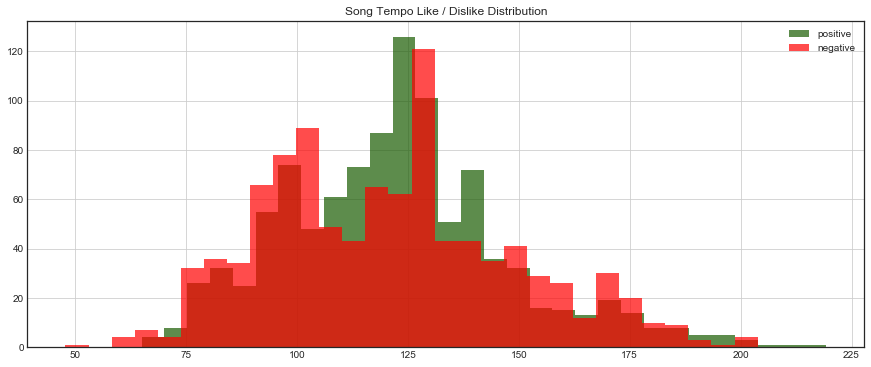

In [11]:
# query data to get tempo for rows where the target is 1 (user liked song)
positive_tempo = data[ data[ 'target' ] == 1 ][ 'tempo' ] 
# query data to get tempo for rows where the target is 0 (user disliked song)
negative_tempo = data[ data[ 'target' ] == 0 ][ 'tempo' ] 

# create graph with size (x,y) and title
fig = plt.figure( figsize = ( 15, 6 ) )
plt.title( "Song Tempo Like / Dislike Distribution" )

# histogram:  alpha make it translucent so you can see both positive/negative, divide data in 30 groups
positive_tempo.hist( alpha = 0.7, bins = 30, label = 'positive' )
negative_tempo.hist( alpha = 0.7, bins = 30, label = 'negative' )

plt.legend( loc = "upper right" )

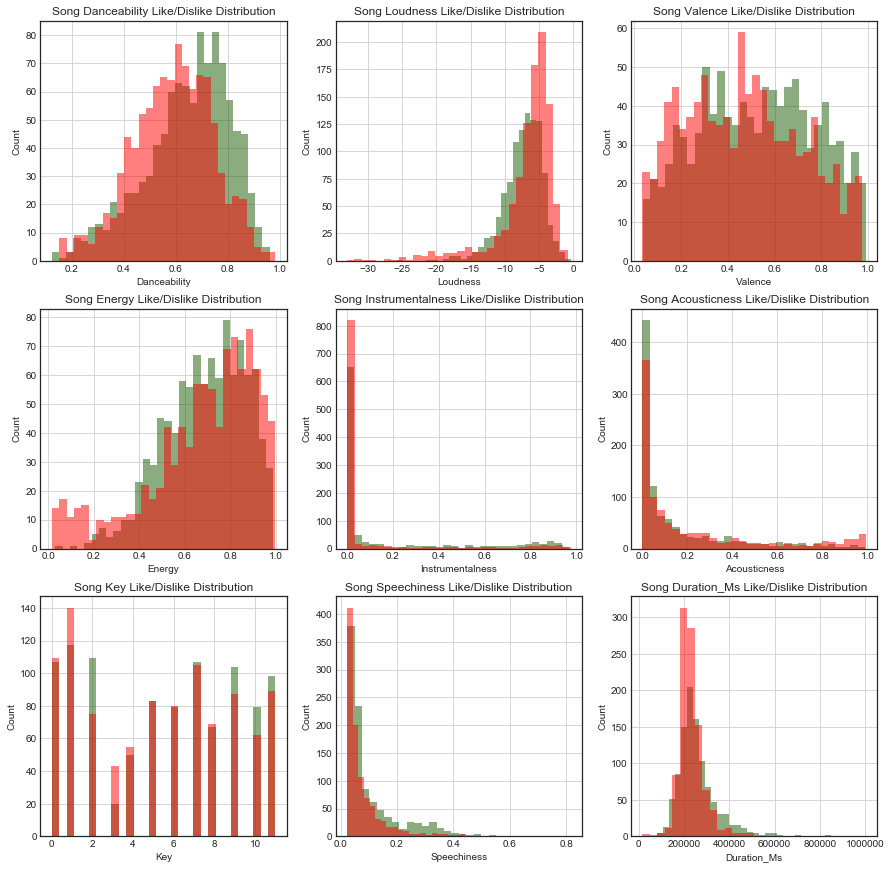

In [12]:
# query data for each feature and store in an dictionary
featureList = [ "danceability", "loudness", "valence", "energy", "instrumentalness", "acousticness", "key", "speechiness", "duration_ms" ]
positiveResultByFeature = data[ data[ 'target' ] == 1 ][ featureList ]
negativeResultByFeature = data[ data[ 'target' ] == 0 ][ featureList ]

# create a graph area to reveal bias and structure of the data
fig1 = plt.figure( figsize = ( 15, 15 ) )

# create and configure mini-graphs for each of the features
# using a dictionary to store each mini-graph
graphPiece = {}
# graph area is divided in 3 by 3 (first row: 331, 332, 333, second row: 334, 335, 336, ...)
i = 330;
for f in featureList:
    i = i + 1
    # create a graph in the proper position:  331, 332, ...
    graphPiece[ f ] = fig1.add_subplot( i )
    # add label with feature name capitalized
    graphPiece[ f ].set_xlabel( f.title() )
    graphPiece[ f ].set_ylabel( 'Count' )
    # add title with feature name capitalized
    graphPiece[ f ].set_title( 'Song {0} Like/Dislike Distribution'.format( f.title() ) )
    # plot negative and positive results for the feature
    positiveResultByFeature[ f ].hist( alpha = 0.5, bins = 30 )
    negativeResultByFeature[ f ].hist( alpha = 0.5, bins = 30 )
    
    

In [13]:
c = DecisionTreeClassifier( min_samples_split = 100 )

# Accuracy using Decision Tree:  67.0 % for min samples = 150
# Accuracy using Decision Tree:  72.9 % for min samples = 100
# Accuracy using Decision Tree:  70.0 % for min samples = 50

features = [ "danceability", "loudness", "valence", "energy", "instrumentalness", "acousticness", "key", "speechiness", "duration_ms" ]
X_train = train[ features ]
Y_train = train[ "target" ]
X_test = test[ features ]
Y_test = test[ "target" ]

In [14]:
dt = c.fit( X_train, Y_train )

In [15]:
def show_tree( tree, features, path ):
    f = io.StringIO() 
    export_graphviz( tree, out_file=f, feature_names=features ) 
    pydotplus.graph_from_dot_data( f.getvalue() ).write_png( path )
    #img = misc.imread( path ) 
    img = imageio.imread( path )
    plt.rcParams[ "figure.figsize" ] = ( 20, 20 ) 
    plt.imshow( img )

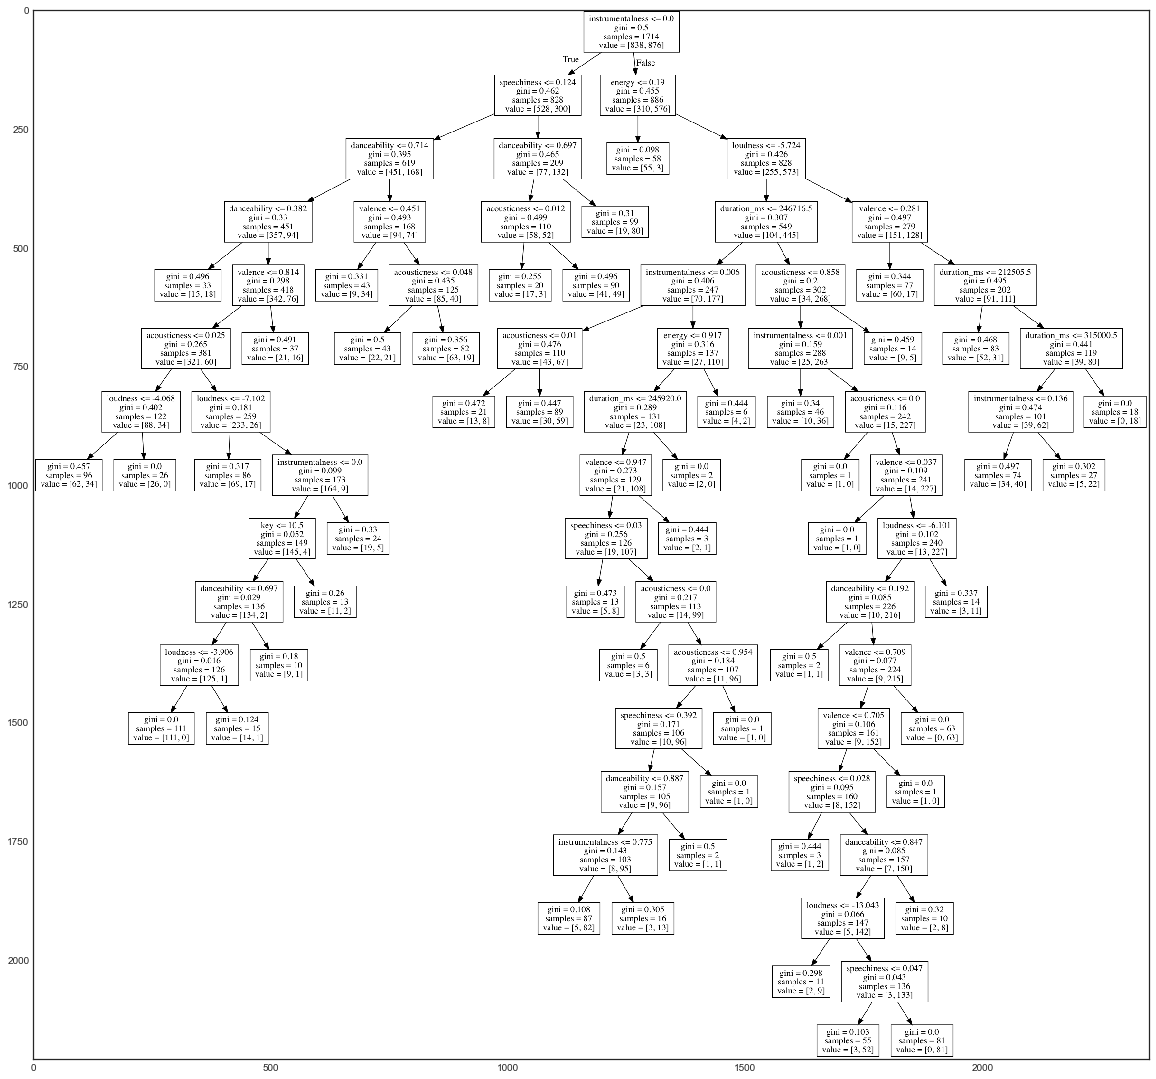

In [16]:
show_tree( dt, features, 'dec_tree_01.png' )

In [17]:
Y_pred = c.predict( X_test )
from sklearn.metrics import accuracy_score
score = accuracy_score( Y_test, Y_pred ) * 100
print( "Accuracy using Decision Tree: ", round( score, 1 ), "%" )

Accuracy using Decision Tree:  72.6 %
